<a href="https://colab.research.google.com/github/Djuikem/Master_Thesis_AIMS/blob/main/CNN_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
#Mean size of images
import os  # Import the os module
import numpy as np
from PIL import Image  # Import the Image module


image_files = '/kaggle/input/images-dataset/Images'

sizes = []
for f in os.listdir(image_files):  # Use os.listdir to iterate over files in the directory
    path = os.path.join(image_files, f)  # Changed image_folder to image_files
    with Image.open(path) as img:
        sizes.append(img.size)

widths, heights = zip(*sizes)
print("Taille moyenne :")
print(f"Largeur : {np.mean(widths):.2f}, Hauteur : {np.mean(heights):.2f}")
'''

'\n#Mean size of images\nimport os  # Import the os module\nimport numpy as np\nfrom PIL import Image  # Import the Image module\n\n\nimage_files = \'/kaggle/input/images-dataset/Images\'\n\nsizes = []\nfor f in os.listdir(image_files):  # Use os.listdir to iterate over files in the directory\n    path = os.path.join(image_files, f)  # Changed image_folder to image_files\n    with Image.open(path) as img:\n        sizes.append(img.size)\n\nwidths, heights = zip(*sizes)\nprint("Taille moyenne :")\nprint(f"Largeur : {np.mean(widths):.2f}, Hauteur : {np.mean(heights):.2f}")\n'

In [ ]:
'''
# Decoupage des données
import os
import shutil
from sklearn.model_selection import train_test_split

# Paramètres
source_dir = '/kaggle/input/images-dataset/Images'  # dossier où sont toutes les images
target_dir = '/kaggle/input/images-dataset'   # Dossier de destination
classes = ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']  # Classes à detecter
test_size = 0.2
val_size = 0.1
random_state = 42

# Regrouper les images par classe
class_files = {cls: [] for cls in classes}
for fname in os.listdir(source_dir):
    for cls in classes:
        if fname.lower().startswith(cls):
            class_files[cls].append(fname)
            break

for fname in os.listdir(source_dir):
    for cls in classes:
        if cls in fname: # Modified the condition to simply check if the class name exists in the filename
            class_files[cls].append(fname)
            break # move to the next file if a class was found

# Créer les dossiers de destination
for split in ['train', 'val', 'test']:
    for cls in classes:
        os.makedirs(os.path.join(target_dir, split, cls), exist_ok=True)

# Répartition et déplacer les fichiers
for cls, files in class_files.items():
    trainval, test = train_test_split(files, test_size=test_size, random_state=random_state)
    train, val = train_test_split(trainval, test_size=val_size, random_state=random_state)

    for split_name, split_files in zip(['train', 'val', 'test'], [train, val, test]):
        for fname in split_files:
            src = os.path.join(source_dir, fname)
            dst = os.path.join(target_dir, split_name, cls, fname)
            shutil.move(src, dst)

print("✅ Réorganisation terminée : les fichiers ont été déplacés dans data/train, data/val et data/test.")
'''

'\n# Decoupage des données\nimport os\nimport shutil\nfrom sklearn.model_selection import train_test_split\n\n# Paramètres\nsource_dir = \'/kaggle/input/images-dataset/Images\'  # dossier où sont toutes les images\ntarget_dir = \'/kaggle/input/images-dataset\'   # Dossier de destination\nclasses = [\'COVID\', \'Lung_Opacity\', \'Normal\', \'Viral Pneumonia\']  # Classes à detecter\ntest_size = 0.2\nval_size = 0.1\nrandom_state = 42\n\n# Regrouper les images par classe\nclass_files = {cls: [] for cls in classes}\nfor fname in os.listdir(source_dir):\n    for cls in classes:\n        if fname.lower().startswith(cls):\n            class_files[cls].append(fname)\n            break\n\nfor fname in os.listdir(source_dir):\n    for cls in classes:\n        if cls in fname: # Modified the condition to simply check if the class name exists in the filename\n            class_files[cls].append(fname)\n            break # move to the next file if a class was found\n\n# Créer les dossiers de destin

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mounted at /content/drive
Found 15235 images belonging to 4 classes.
Found 1695 images belonging to 4 classes.
Found 4235 images belonging to 4 classes.

✅ 4 classes détectées : ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 297, 297, 4)    │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 297, 297, 4)    │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 8)      │           296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 97, 97, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 30, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        51,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,052 (207.23 KB)

 Trainable params: 52,996 (207.02 KB)

 Non-trainable params: 56 (224.00 B)


🎯 Class Weights: {0: np.float64(1.4637778631821676), 1: np.float64(0.880025415896488), 2: np.float64(0.5191154422788605), 3: np.float64(3.934659090909091)}


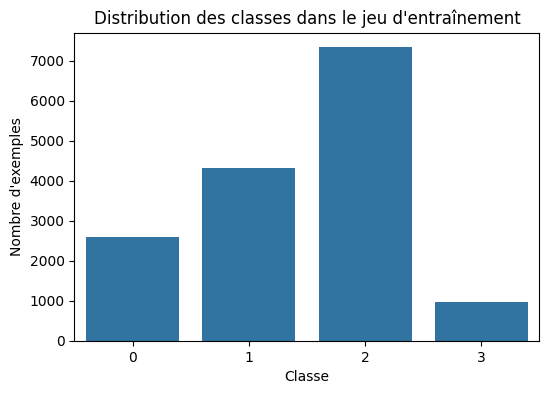

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.3681 - loss: 1.3106

477/477 ━━━━━━━━━━━━━━━━━━━━ 3800s 8s/step - accuracy: 0.3681 - loss: 1.3102 - val_accuracy: 0.5805 - val_loss: 1.0043
Epoch 2/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4494 - loss: 1.0211

477/477 ━━━━━━━━━━━━━━━━━━━━ 1219s 3s/step - accuracy: 0.4494 - loss: 1.0210 - val_accuracy: 0.6342 - val_loss: 0.9419
Epoch 3/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5298 - loss: 0.9502

477/477 ━━━━━━━━━━━━━━━━━━━━ 1197s 3s/step - accuracy: 0.5298 - loss: 0.9501 - val_accuracy: 0.6614 - val_loss: 0.8259
Epoch 4/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 1177s 2s/step - accuracy: 0.5319 - loss: 0.9043 - val_accuracy: 0.6035 - val_loss: 0.8533
Epoch 5/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5463 - loss: 0.8748

477/477 ━━━━━━━━━━━━━━━━━━━━ 1177s 2s/step - accuracy: 0.5463 - loss: 0.8747 - val_accuracy: 0.6755 - val_loss: 0.9066
Epoch 6/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 1187s 2s/step - accuracy: 0.5817 - loss: 0.8466 - val_accuracy: 0.6667 - val_loss: 0.7624
Epoch 7/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5941 - loss: 0.7947

477/477 ━━━━━━━━━━━━━━━━━━━━ 1196s 3s/step - accuracy: 0.5941 - loss: 0.7947 - val_accuracy: 0.6944 - val_loss: 0.7559
Epoch 8/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6240 - loss: 0.7710

477/477 ━━━━━━━━━━━━━━━━━━━━ 1196s 3s/step - accuracy: 0.6240 - loss: 0.7710 - val_accuracy: 0.6979 - val_loss: 0.7584
Epoch 9/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 1185s 2s/step - accuracy: 0.6267 - loss: 0.7674 - val_accuracy: 0.4177 - val_loss: 1.1096
Epoch 10/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 1180s 2s/step - accuracy: 0.6575 - loss: 0.7465 - val_accuracy: 0.6531 - val_loss: 0.8211
Epoch 11/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 1182s 2s/step - accuracy: 0.6532 - loss: 0.7467 - val_accuracy: 0.4496 - val_loss: 1.7431
Epoch 12/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6828 - loss: 0.7211

477/477 ━━━━━━━━━━━━━━━━━━━━ 1188s 2s/step - accuracy: 0.6828 - loss: 0.7211 - val_accuracy: 0.7646 - val_loss: 0.6337
Epoch 13/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 1183s 2s/step - accuracy: 0.6869 - loss: 0.7012 - val_accuracy: 0.6749 - val_loss: 0.8297
Epoch 14/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 1164s 2s/step - accuracy: 0.6910 - loss: 0.6899 - val_accuracy: 0.2425 - val_loss: 2.9737
Epoch 15/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 1168s 2s/step - accuracy: 0.6940 - loss: 0.6819 - val_accuracy: 0.7434 - val_loss: 0.6679
Epoch 16/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7191 - loss: 0.6573

477/477 ━━━━━━━━━━━━━━━━━━━━ 1172s 2s/step - accuracy: 0.7191 - loss: 0.6573 - val_accuracy: 0.7864 - val_loss: 0.5942
Epoch 17/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 1195s 3s/step - accuracy: 0.7114 - loss: 0.6483 - val_accuracy: 0.2260 - val_loss: 3.4081
Epoch 18/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7191 - loss: 0.6592

477/477 ━━━━━━━━━━━━━━━━━━━━ 1221s 3s/step - accuracy: 0.7191 - loss: 0.6591 - val_accuracy: 0.7900 - val_loss: 0.6176
Epoch 19/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 1180s 2s/step - accuracy: 0.7224 - loss: 0.6312 - val_accuracy: 0.6425 - val_loss: 0.8807
Epoch 20/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 1233s 2s/step - accuracy: 0.7204 - loss: 0.6319 - val_accuracy: 0.7770 - val_loss: 0.5721
Epoch 21/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 1195s 3s/step - accuracy: 0.7201 - loss: 0.6358 - val_accuracy: 0.2708 - val_loss: 3.4064
Epoch 22/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 1165s 2s/step - accuracy: 0.7224 - loss: 0.6168 - val_accuracy: 0.4313 - val_loss: 1.6539
Epoch 23/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 1183s 2s/step - accuracy: 0.7245 - loss: 0.6233 - val_accuracy: 0.6354 - val_loss: 1.1217
Epoch 24/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7262 - loss: 0.6073

477/477 ━━━━━━━━━━━━━━━━━━━━ 1218s 2s/step - accuracy: 0.7262 - loss: 0.6073 - val_accuracy: 0.8165 - val_loss: 0.5552
Epoch 25/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 1198s 3s/step - accuracy: 0.7316 - loss: 0.5923 - val_accuracy: 0.7463 - val_loss: 0.6666
Epoch 26/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 1209s 3s/step - accuracy: 0.7436 - loss: 0.6042 - val_accuracy: 0.6301 - val_loss: 0.9994
Epoch 27/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 1196s 3s/step - accuracy: 0.7396 - loss: 0.5951 - val_accuracy: 0.6808 - val_loss: 0.8478
Epoch 28/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 1178s 2s/step - accuracy: 0.7391 - loss: 0.5991 - val_accuracy: 0.6472 - val_loss: 1.0155
Epoch 29/30
477/477 ━━━━━━━━━━━━━━━━━━━━ 1192s 2s/step - accuracy: 0.7453 - loss: 0.5770 - val_accuracy: 0.5982 - val_loss: 1.3161
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 1239s 293ms/step - accuracy: 0.7948 - loss: 0.5148

✅ Test accuracy: 0.8205
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 117s 28ms/step

Classification Report:
                 precision    recall  f1-score   

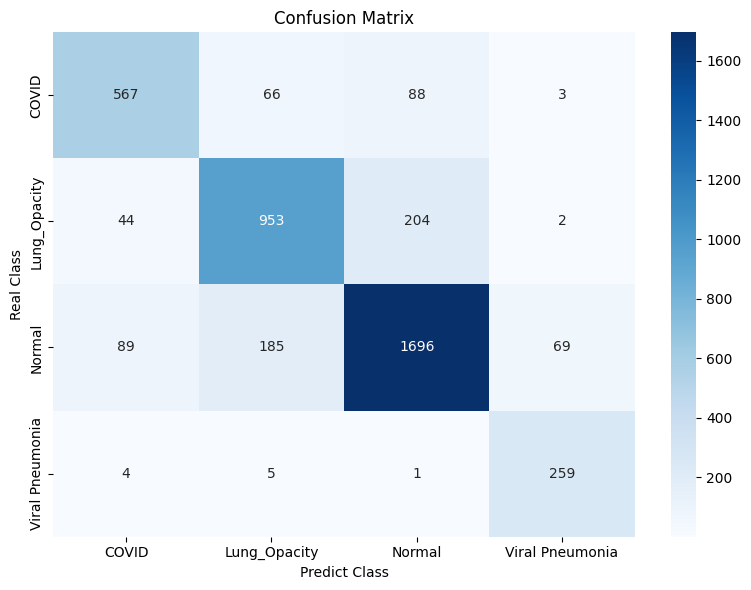

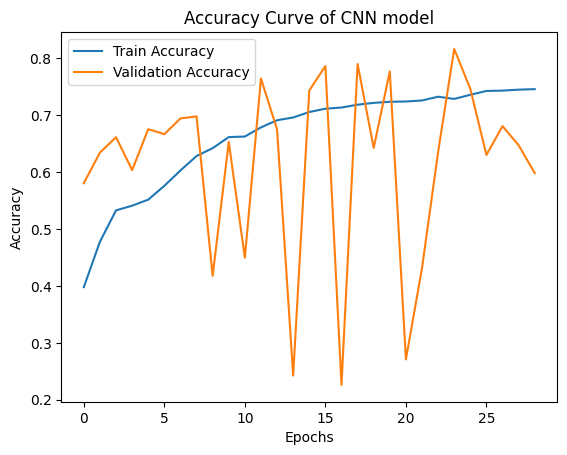

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.utils import plot_model
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import seaborn as sns

# -------------------------
# 0. MONTER GOOGLE DRIVE
# -------------------------
from google.colab import drive
drive.mount('/content/drive')

# -------------------------
# 1. PARAMÈTRES GLOBAUX
# -------------------------
IMG_SIZE = (299, 299)
BATCH_SIZE = 32
EPOCHS = 30
DATASET_DIR = '/content/drive/MyDrive/data'  # Doit contenir train/val/test

# -------------------------
# 2. PRÉTRAITEMENT DES IMAGES
# -------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    os.path.join(DATASET_DIR, 'train'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_gen = val_test_datagen.flow_from_directory(
    os.path.join(DATASET_DIR, 'val'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_gen = val_test_datagen.flow_from_directory(
    os.path.join(DATASET_DIR, 'test'),
    target_size=IMG_SIZE,
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

# Vérification du nombre de classes
num_classes = train_gen.num_classes
class_labels = list(train_gen.class_indices.keys())
print(f"\n✅ {num_classes} classes détectées : {class_labels}")

assert num_classes == 4, "Erreur : Ce script est conçu pour exactement 4 classes."

# -------------------------
# 3. DÉFINITION DU MODÈLE CNN
# -------------------------
model = models.Sequential([
    layers.Input(shape=(*IMG_SIZE, 3)),

    layers.Conv2D(4, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(3, 3),

    layers.Conv2D(8, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(3, 3),

    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(3, 3),

    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
plot_model(model, show_shapes=True)


# Récupérer les étiquettes des classes dans le générateur
y_train = train_gen.classes

# Calcul des poids
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)

class_weights = dict(enumerate(class_weights))
print("\n🎯 Class Weights:", class_weights)

counter = Counter(y_train)
plt.figure(figsize=(6, 4))
sns.barplot(x=list(counter.keys()), y=list(counter.values()))
plt.title("Distribution des classes dans le jeu d'entraînement")
plt.xlabel("Classe")
plt.ylabel("Nombre d'exemples")
plt.show()


# -------------------------
# 4. CALLBACKS
# -------------------------
checkpoint = callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_accuracy', mode='max')
earlystop = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# -------------------------
# 5. ENTRAÎNEMENT DU MODÈLE
# -------------------------
history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    callbacks=[checkpoint, earlystop],
    class_weight=class_weights
)

# -------------------------
# 6. ÉVALUATION DU MODÈLE
# -------------------------
test_gen.reset()
loss, accuracy = model.evaluate(test_gen)
print(f"\n✅ Test accuracy: {accuracy:.4f}")

# Prédictions
y_pred = model.predict(test_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_gen.classes

# Rapport
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("\nConfusion Matrix:")
print(conf_matrix)

# -------------------------
# Affichage de la matrice de confusion sous forme d'image
# -------------------------
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predict Class')
plt.ylabel('Real Class')
plt.tight_layout()
plt.savefig('confusion_matrix_cnn.png')
plt.show()

# -------------------------
# 7. COURBES D’APPRENTISSAGE- accuracy
# -------------------------
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curve of CNN model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig('accuracy_curve_cnn.png')
plt.show()


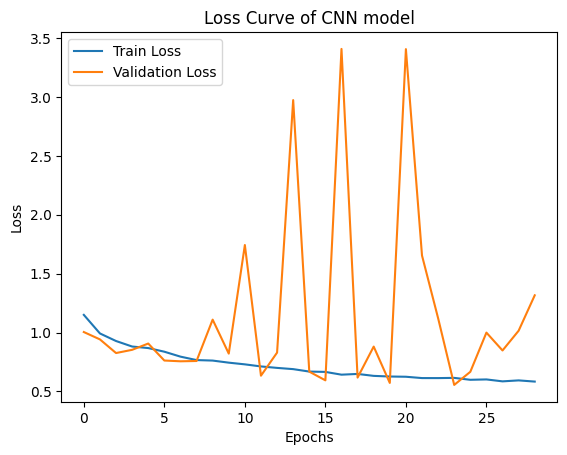

In [ ]:
# -------------------------
# 8. COURBES D’APPRENTISSAGE- loss
# -------------------------
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve of CNN model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig('loss_curve_cnn.png')
plt.show()

Mounted at /content/drive
Found 15235 images belonging to 4 classes.
Found 1695 images belonging to 4 classes.
Found 4235 images belonging to 4 classes.

✅ 4 classes détectées : ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 297, 297, 4)    │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 297, 297, 4)    │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 8)      │           296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 97, 97, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 30, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        51,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,052 (207.23 KB)

 Trainable params: 52,996 (207.02 KB)

 Non-trainable params: 56 (224.00 B)


🎯 Class Weights: {0: np.float64(1.4637778631821676), 1: np.float64(0.880025415896488), 2: np.float64(0.5191154422788605), 3: np.float64(3.934659090909091)}


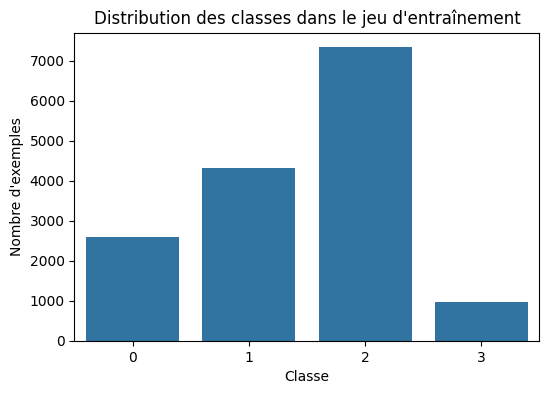

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.3621 - loss: 1.3319

477/477 ━━━━━━━━━━━━━━━━━━━━ 3591s 8s/step - accuracy: 0.3622 - loss: 1.3315 - val_accuracy: 0.4920 - val_loss: 1.0703
Epoch 2/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5013 - loss: 0.9690

477/477 ━━━━━━━━━━━━━━━━━━━━ 1189s 2s/step - accuracy: 0.5013 - loss: 0.9690 - val_accuracy: 0.6289 - val_loss: 0.8924
Epoch 3/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 1160s 2s/step - accuracy: 0.5360 - loss: 0.8977 - val_accuracy: 0.6142 - val_loss: 0.9330
Epoch 4/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 1161s 2s/step - accuracy: 0.5625 - loss: 0.8596 - val_accuracy: 0.5174 - val_loss: 1.0882
Epoch 5/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5763 - loss: 0.8432

477/477 ━━━━━━━━━━━━━━━━━━━━ 1154s 2s/step - accuracy: 0.5763 - loss: 0.8432 - val_accuracy: 0.6791 - val_loss: 0.8458
Epoch 6/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6020 - loss: 0.7946

477/477 ━━━━━━━━━━━━━━━━━━━━ 1155s 2s/step - accuracy: 0.6020 - loss: 0.7946 - val_accuracy: 0.6796 - val_loss: 0.8211
Epoch 7/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6131 - loss: 0.7855

477/477 ━━━━━━━━━━━━━━━━━━━━ 1158s 2s/step - accuracy: 0.6131 - loss: 0.7855 - val_accuracy: 0.7428 - val_loss: 0.6863
Epoch 8/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 1164s 2s/step - accuracy: 0.6189 - loss: 0.7628 - val_accuracy: 0.6720 - val_loss: 0.8621
Epoch 9/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 1142s 2s/step - accuracy: 0.6213 - loss: 0.7822 - val_accuracy: 0.7080 - val_loss: 0.7391
Epoch 10/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 1146s 2s/step - accuracy: 0.6469 - loss: 0.7400 - val_accuracy: 0.6035 - val_loss: 0.9232
Epoch 11/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 1154s 2s/step - accuracy: 0.6523 - loss: 0.7349 - val_accuracy: 0.6625 - val_loss: 0.8633
Epoch 12/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6527 - loss: 0.7399

477/477 ━━━━━━━━━━━━━━━━━━━━ 1152s 2s/step - accuracy: 0.6527 - loss: 0.7399 - val_accuracy: 0.7628 - val_loss: 0.6468
Epoch 13/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 1166s 2s/step - accuracy: 0.6714 - loss: 0.6969 - val_accuracy: 0.7540 - val_loss: 0.7213
Epoch 14/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 1160s 2s/step - accuracy: 0.6625 - loss: 0.7203 - val_accuracy: 0.7392 - val_loss: 0.6585
Epoch 15/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 1150s 2s/step - accuracy: 0.6615 - loss: 0.6877 - val_accuracy: 0.7322 - val_loss: 0.7003
Epoch 16/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 1165s 2s/step - accuracy: 0.6849 - loss: 0.6816 - val_accuracy: 0.6619 - val_loss: 0.7947
Epoch 17/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6832 - loss: 0.6736

477/477 ━━━━━━━━━━━━━━━━━━━━ 1160s 2s/step - accuracy: 0.6832 - loss: 0.6736 - val_accuracy: 0.7723 - val_loss: 0.6431
Epoch 18/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 1159s 2s/step - accuracy: 0.6868 - loss: 0.6556 - val_accuracy: 0.7198 - val_loss: 0.7373
Epoch 19/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 1160s 2s/step - accuracy: 0.6820 - loss: 0.6683 - val_accuracy: 0.6649 - val_loss: 0.8831
Epoch 20/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7059 - loss: 0.6284

477/477 ━━━━━━━━━━━━━━━━━━━━ 1157s 2s/step - accuracy: 0.7059 - loss: 0.6284 - val_accuracy: 0.8018 - val_loss: 0.5664
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 1178s 278ms/step - accuracy: 0.7823 - loss: 0.5707

✅ Test accuracy: 0.8120
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 113s 27ms/step

Classification Report:
                 precision    recall  f1-score   support

          COVID       0.86      0.73      0.79       724
   Lung_Opacity       0.73      0.82      0.77      1203
         Normal       0.86      0.82      0.84      2039
Viral Pneumonia       0.81      0.96      0.88       269

       accuracy                           0.81      4235
      macro avg       0.81      0.83      0.82      4235
   weighted avg       0.82      0.81      0.81      4235


Confusion Matrix:
[[ 528   97   93    6]
 [  30  990  177    6]
 [  53  276 1662   48]
 [   0    1    9  259]]


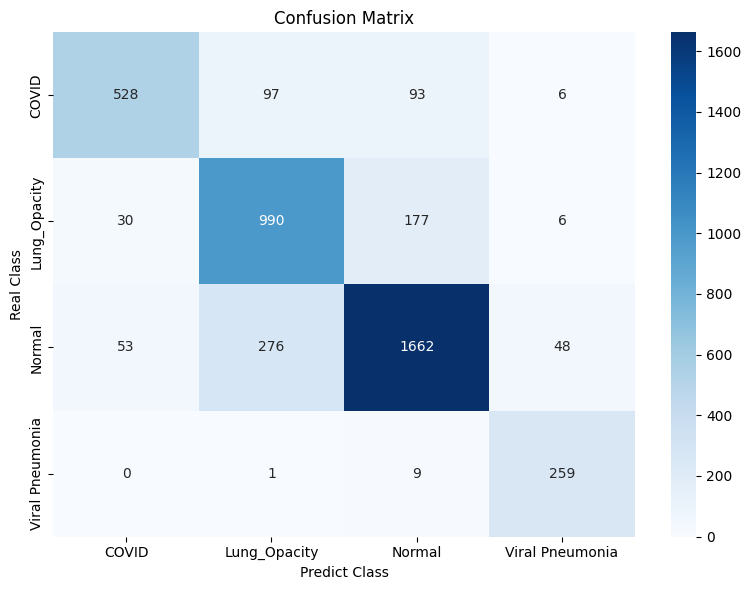

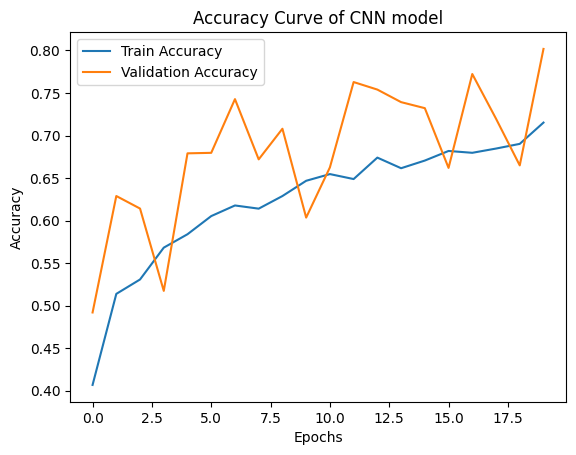

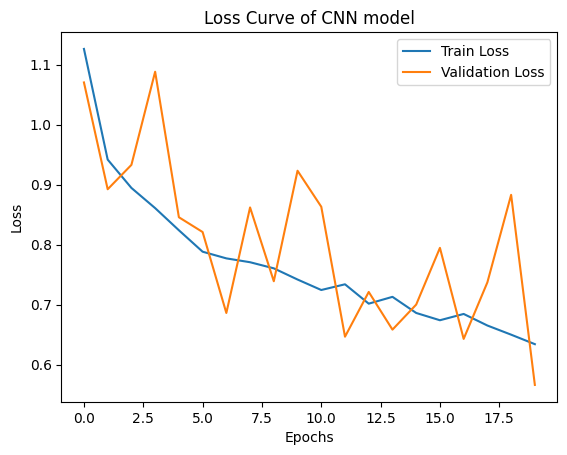

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.utils import plot_model
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import seaborn as sns

# -------------------------
# 0. MONTER GOOGLE DRIVE
# -------------------------
from google.colab import drive
drive.mount('/content/drive')

# -------------------------
# 1. PARAMÈTRES GLOBAUX
# -------------------------
IMG_SIZE = (299, 299)
BATCH_SIZE = 32
EPOCHS = 20
DATASET_DIR = '/content/drive/MyDrive/data'  # Doit contenir train/val/test

# -------------------------
# 2. PRÉTRAITEMENT DES IMAGES
# -------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    os.path.join(DATASET_DIR, 'train'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_gen = val_test_datagen.flow_from_directory(
    os.path.join(DATASET_DIR, 'val'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_gen = val_test_datagen.flow_from_directory(
    os.path.join(DATASET_DIR, 'test'),
    target_size=IMG_SIZE,
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

# Vérification du nombre de classes
num_classes = train_gen.num_classes
class_labels = list(train_gen.class_indices.keys())
print(f"\n✅ {num_classes} classes détectées : {class_labels}")

assert num_classes == 4, "Erreur : Ce script est conçu pour exactement 4 classes."

# -------------------------
# 3. DÉFINITION DU MODÈLE CNN
# -------------------------
model = models.Sequential([
    layers.Input(shape=(*IMG_SIZE, 3)),

    layers.Conv2D(4, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(3, 3),

    layers.Conv2D(8, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(3, 3),

    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(3, 3),

    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
plot_model(model, show_shapes=True)


# Récupérer les étiquettes des classes dans le générateur
y_train = train_gen.classes

# Calcul des poids
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)

class_weights = dict(enumerate(class_weights))
print("\n🎯 Class Weights:", class_weights)

counter = Counter(y_train)
plt.figure(figsize=(6, 4))
sns.barplot(x=list(counter.keys()), y=list(counter.values()))
plt.title("Distribution des classes dans le jeu d'entraînement")
plt.xlabel("Classe")
plt.ylabel("Nombre d'exemples")
plt.show()


# -------------------------
# 4. CALLBACKS
# -------------------------
checkpoint = callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_accuracy', mode='max')
earlystop = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# -------------------------
# 5. ENTRAÎNEMENT DU MODÈLE
# -------------------------
history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    callbacks=[checkpoint, earlystop],
    class_weight=class_weights
)

# -------------------------
# 6. ÉVALUATION DU MODÈLE
# -------------------------
test_gen.reset()
loss, accuracy = model.evaluate(test_gen)
print(f"\n✅ Test accuracy: {accuracy:.4f}")

# Prédictions
y_pred = model.predict(test_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_gen.classes

# Rapport
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("\nConfusion Matrix:")
print(conf_matrix)

# -------------------------
# Affichage de la matrice de confusion sous forme d'image
# -------------------------
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predict Class')
plt.ylabel('Real Class')
plt.tight_layout()
plt.savefig('confusion_matrix_cnn.png')
plt.show()

# -------------------------
# 7. COURBES D’APPRENTISSAGE- accuracy
# -------------------------
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curve of CNN model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig('accuracy_curve_cnn.png')
plt.show()

# -------------------------
# 8. COURBES D’APPRENTISSAGE- loss
# -------------------------
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve of CNN model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig('loss_curve_cnn.png')
plt.show()

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import gc

# -------------------------------
# PARAMÈTRES
# -------------------------------
DATASET_DIR = '/content/drive/MyDrive/data/train'  # <-- fusionne train/val si besoin
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 5
NUM_CLASSES = 4

# -------------------------------
# CRÉER UN DATAFRAME DES IMAGES
# -------------------------------
def build_dataframe_from_directory(base_dir):
    filepaths = []
    labels = []
    for class_name in sorted(os.listdir(base_dir)):
        class_dir = os.path.join(base_dir, class_name)
        if os.path.isdir(class_dir):
            for fname in os.listdir(class_dir):
                if fname.lower().endswith(('.png')):
                    filepaths.append(os.path.join(class_dir, fname))
                    labels.append(class_name)
    df = pd.DataFrame({'filename': filepaths, 'class': labels})
    return df

df = build_dataframe_from_directory(DATASET_DIR)
class_names = sorted(df['class'].unique())

# -------------------------------
# IMAGE GENERATOR
# -------------------------------
datagen = ImageDataGenerator(rescale=1./255)

# -------------------------------
# MODELE CNN SIMPLE
# -------------------------------
def create_model(input_shape=(128, 128, 3), num_classes=4):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Conv2D(8, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2),
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# -------------------------------
# CROSS-VALIDATION
# -------------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(df)):
    print(f"\n📂 Fold {fold+1}/5")

    train_df = df.iloc[train_idx]
    val_df = df.iloc[val_idx]

    train_gen = datagen.flow_from_dataframe(
        train_df,
        x_col='filename',
        y_col='class',
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=True
    )

    val_gen = datagen.flow_from_dataframe(
        val_df,
        x_col='filename',
        y_col='class',
        target_size=IMG_SIZE,
        batch_size=1,  # Important pour récupérer toutes les étiquettes
        class_mode='categorical',
        shuffle=False
    )

    tf.keras.backend.clear_session()
    gc.collect()

    model = create_model(input_shape=(*IMG_SIZE, 3), num_classes=NUM_CLASSES)
    model.fit(train_gen, epochs=EPOCHS, verbose=1)

    y_true = val_gen.classes
    y_pred_probs = model.predict(val_gen, verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1)

    f1 = f1_score(y_true, y_pred, average='weighted')
    f1_scores.append(f1)
    print(f"🎯 F1-score pondéré (fold {fold+1}): {f1:.4f}")

# -------------------------------
# RÉSULTATS
# -------------------------------
print("\n✅ Résumé des F1-scores:")
for i, f1 in enumerate(f1_scores):
    print(f"  Fold {i+1}: {f1:.4f}")
print(f"\n📊 Moyenne des F1-scores: {np.mean(f1_scores):.4f}")



📂 Fold 1/5
Found 12188 validated image filenames belonging to 4 classes.
Found 3047 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 4513s 12s/step - accuracy: 0.5354 - loss: 1.1300
Epoch 2/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 60s 158ms/step - accuracy: 0.6225 - loss: 0.8717
Epoch 3/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 60s 158ms/step - accuracy: 0.6417 - loss: 0.7988
Epoch 4/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 59s 155ms/step - accuracy: 0.6650 - loss: 0.7657
Epoch 5/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 59s 154ms/step - accuracy: 0.6786 - loss: 0.7276
🎯 F1-score pondéré (fold 1): 0.7794

📂 Fold 2/5
Found 12188 validated image filenames belonging to 4 classes.
Found 3047 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 64s 159ms/step - accuracy: 0.4816 - loss: 1.1994
Epoch 2/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 81s 161ms/step - accuracy: 0.5824 - loss: 0.9703
Epoch 3/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 82s 160ms/step - accuracy: 0.6329 - loss: 0.8755
Epoch 4/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 81s 158ms/step - accuracy: 0.6354 - loss: 0.8646
Epoch 5/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 61s 159ms/step - accuracy: 0.6493 - loss: 0.8255
🎯 F1-score pondéré (fold 2): 0.7711

📂 Fold 3/5
Found 12188 validated image filenames belonging to 4 classes.
Found 3047 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 63s 157ms/step - accuracy: 0.5470 - loss: 1.0224
Epoch 2/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 60s 158ms/step - accuracy: 0.6563 - loss: 0.8030
Epoch 3/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 59s 155ms/step - accuracy: 0.6998 - loss: 0.7382
Epoch 4/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 60s 156ms/step - accuracy: 0.7104 - loss: 0.7072
Epoch 5/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 82s 157ms/step - accuracy: 0.7139 - loss: 0.6962
🎯 F1-score pondéré (fold 3): 0.7988

📂 Fold 4/5
Found 12188 validated image filenames belonging to 4 classes.
Found 3047 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 62s 157ms/step - accuracy: 0.5499 - loss: 1.0218
Epoch 2/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 60s 158ms/step - accuracy: 0.6671 - loss: 0.7943
Epoch 3/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 59s 156ms/step - accuracy: 0.6947 - loss: 0.7433
Epoch 4/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 82s 158ms/step - accuracy: 0.7097 - loss: 0.7097
Epoch 5/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 59s 154ms/step - accuracy: 0.7359 - loss: 0.6685
🎯 F1-score pondéré (fold 4): 0.7865

📂 Fold 5/5
Found 12188 validated image filenames belonging to 4 classes.
Found 3047 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 64s 161ms/step - accuracy: 0.5000 - loss: 1.1331
Epoch 2/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 59s 156ms/step - accuracy: 0.5620 - loss: 0.9522
Epoch 3/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 59s 155ms/step - accuracy: 0.5814 - loss: 0.9113
Epoch 4/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 60s 159ms/step - accuracy: 0.6031 - loss: 0.8734
Epoch 5/5
381/381 ━━━━━━━━━━━━━━━━━━━━ 61s 161ms/step - accuracy: 0.6235 - loss: 0.8333
🎯 F1-score pondéré (fold 5): 0.7418

✅ Résumé des F1-scores:
  Fold 1: 0.7794
  Fold 2: 0.7711
  Fold 3: 0.7988
  Fold 4: 0.7865
  Fold 5: 0.7418

📊 Moyenne des F1-scores: 0.7755


#F1-Score over 5 folds of the two best models

In [ ]:
f1_svm_rbf = [0.8835, 0.8901, 0.8695, 0.8811, 0.8953]
#f1_cnn = [0.5989, 0.7818, 0.5331, 0.7773, 0.7828]

f1_cnn = [0.7794, 0.7711, 0.7988, 0.7865, 0.7418]

#Shapiro test

for the normality test

In [ ]:
from scipy.stats import shapiro

# Étape 1 : calcul des différences
differences = [cnn - svm_rbf for cnn, svm_rbf in zip(f1_cnn, f1_svm_rbf)]

# Étape 2 : test de Shapiro-Wilk
stat, p_value = shapiro(differences)

print(f"Statistique de Shapiro = {stat:.4f}, p-value = {p_value:.4f}")

if p_value > 0.05:
    print("✅ Les différences suivent une loi normale (on peut utiliser le t-test).")
else:
    print("❌ Les différences ne suivent pas une loi normale (préférer le test de Wilcoxon).")


Statistique de Shapiro = 0.9827, p-value = 0.9487
✅ Les différences suivent une loi normale (on peut utiliser le t-test).


# Wilcoxon test

In [ ]:
from scipy.stats import wilcoxon

wilcoxon_test = wilcoxon(f1_cnn, f1_svm_rbf)
print("\nWilcoxon test:", wilcoxon_test)

# Les mêmes séries de scores
stat, p = wilcoxon(f1_cnn, f1_svm_rbf)

print(f"Wilcoxon statistic = {stat:.4f}, p-value = {p:.4f}")
if p < 0.05:
    print("Différence significative entre les modèles.")
else:
    print("Pas de différence significative.")



Wilcoxon test: WilcoxonResult(statistic=np.float64(0.0), pvalue=np.float64(0.0625))
Wilcoxon statistic = 0.0000, p-value = 0.0625
Pas de différence significative.


In [ ]:
from scipy.stats import ttest_rel

t_test = ttest_rel(f1_cnn, f1_svm_rbf)
print("\nPaired t-test:", t_test)
# Ex : f1_scores_rnn et f1_scores_lstm sont des listes de F1-scores sur k-folds
t_stat = t_test.statistic
p_value = t_test.pvalue

print(f"t-statistic = {t_stat:.4f}, p-value = {p_value:.6f}")
if p_value < 0.05:
    print("Différence significative entre les modèles.")
else:
    print("Pas de différence significative.")



Paired t-test: TtestResult(statistic=np.float64(-7.887045387910893), pvalue=np.float64(0.0013974180423875705), df=np.int64(4))
t-statistic = -7.8870, p-value = 0.001397
Différence significative entre les modèles.
